## 1. Grafos e redes

### 1.8 Um exemplo mágico

https://search.r-project.org/CRAN/refmans/networkDynamicData/html/harry_potter.html

https://www.stats.ox.ac.uk/~snijders/siena/HarryPotterData.html

In [1]:
import pandas as pd
import networkx as nx
import matplotlib . pyplot as plt

**Bossaert & Meidert** fizeram um estudo das redes sociais dos personagens dos primeiros seis livros da saga Harry Potter. 

**hpattributes.txt**: contem atributos de cada personagem, isto é, ano da escola, sexo, e casa de Hogwarts.

**hpbook1.txt, hpbook2.txt, ..., hpbook6.txt**: contêm as matrizes de adjacência para cada um dos livros. 
Uma ligação do personagem i com o personagem j indica que i dá apoia (dá suporte emocional) a j.
Trata-se de uma rede direcionada.

**hpnames.txt**: contem os nomes dos personagens.

In [18]:
attri = pd.read_csv('../../data/harrypotter/hpattributes.txt', sep='\t')

book1 = pd.read_csv('../../data/harrypotter/hpbook1.txt', sep=' ', header=None)
#book2 = pd.read_csv('../../data/harrypotter/hpbook2.txt', sep=' ', header=None)
#book3 = pd.read_csv('../../data/harrypotter/hpbook3.txt', sep=' ', header=None)

name = pd.read_csv('../../data/harrypotter/hpnames.txt', sep='\t')

In [19]:
print('Palavras chaves de attri : ')
print(list(attri.columns.values))

Palavras chaves de attri : 
['id', 'schoolyear', 'gender', 'house']


In [20]:
print(attri)

    id  schoolyear  gender  house
0    1        1989       1      4
1    2        1989       2      1
2    3        1989       2      1
3    4        1991       1      3
4    5        1991       1      4
..  ..         ...     ...    ...
59  60        1991       2      2
60  61        1991       1      3
61  62        1991       1      4
62  63        1991       1      4
63  64        1991       1      2

[64 rows x 4 columns]


In [21]:
print('Palavras chaves de name :')
print(list(name.columns.values))

Palavras chaves de name :
['id', 'name']


In [22]:
print(name)

    id               name
0    1       Adrian Pucey
1    2     Alicia Spinnet
2    3   Angelina Johnson
3    4  Anthony Goldstein
4    5      Blaise Zabini
..  ..                ...
59  60        Susan Bones
60  61         Terry Boot
61  62      Theodore Nott
62  63     Vincent Crabbe
63  64    Zacharias Smith

[64 rows x 2 columns]


In [23]:
print('Palavras chaves dos books :')
print(list(book1.columns.values))

Palavras chaves dos books :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [24]:
print(book1)

    0   1   2   3   4   5   6   7   8   9   ...  54  55  56  57  58  59  60  \
0    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
59   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
60   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
61   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
62   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
63   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

    61  62  63  
0    0   0   0  
1    0   0   0  


In [ ]:
PG = nx.DiGraph()
n = attri.shape[0]

# Primeiro agregamos os nós
for k in range(n):
    PG.add_node(
        k, 
        nome = name['name'][k],
        ano = attri['schoolyear'][k],
        gen = attri ['gender'][k],
        casa = attri ['house'][k]
    )
    
# definimos os book
book = book1

# Construímos a rede
for k in range(n):
    for m in range(n):
        if book.values[k][m] == 1:
            PG.add_edge(k,m)


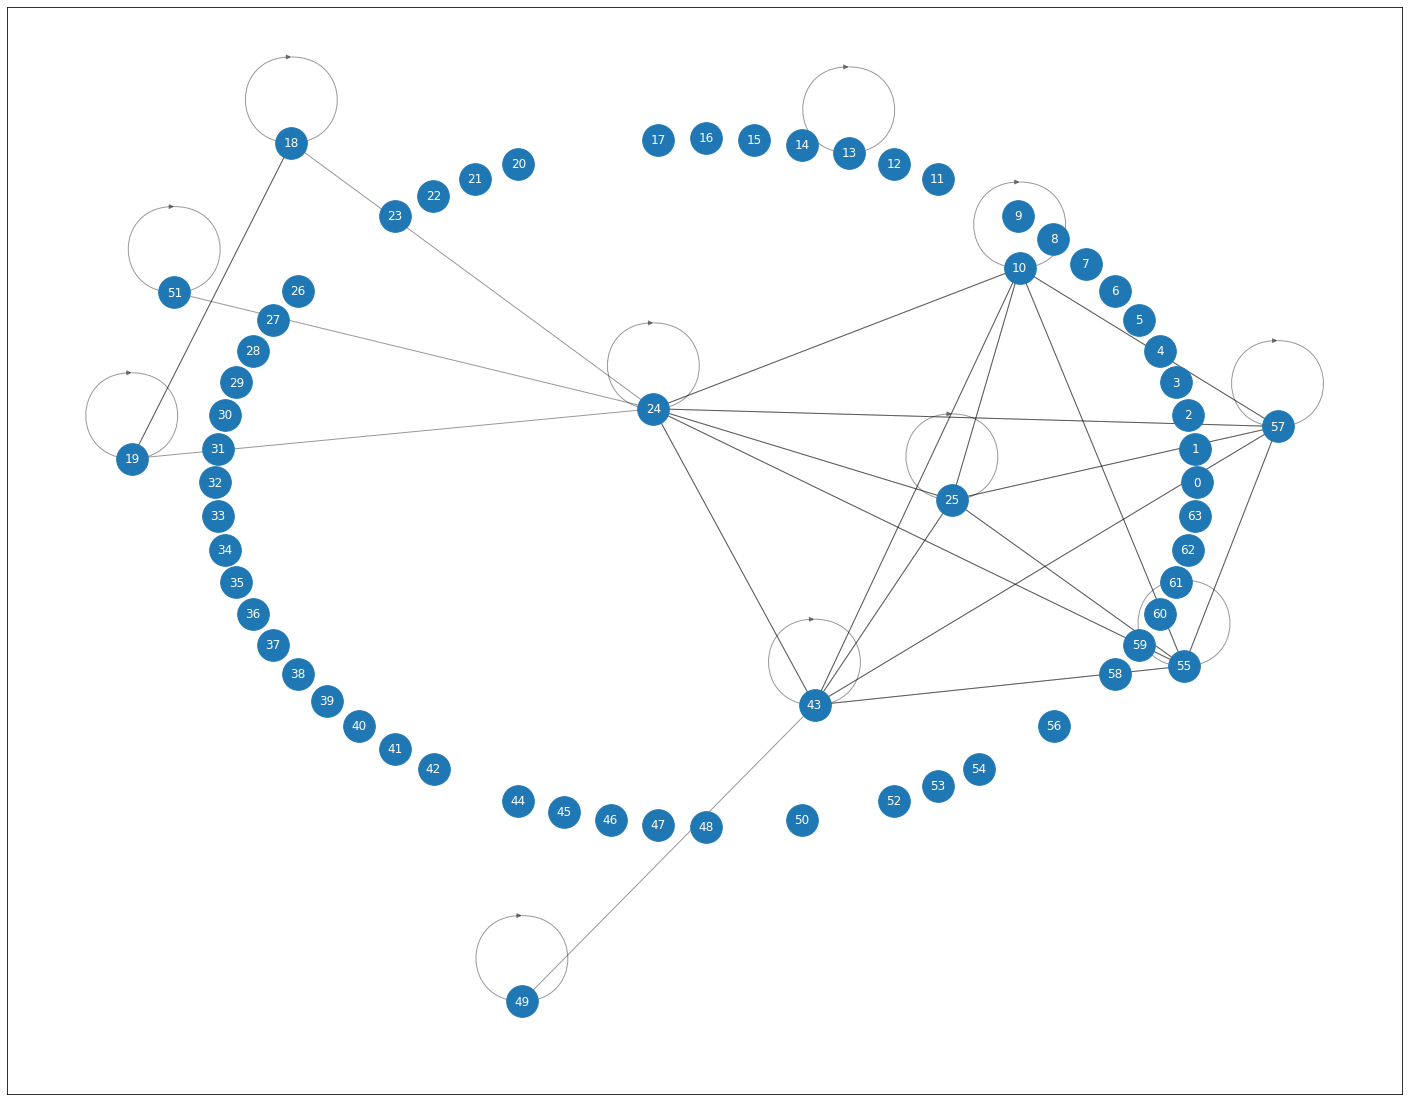

In [49]:
# gráfico random_internet_as_graph

fig, ax = plt.subplots(1,1,figsize=(25,20))

# network
G = PG

# layout position
pos = nx.kamada_kawai_layout(G)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=1000,
                               pos=pos, 
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.show()

In [50]:
# configuração das cores

# lista de cores
cores = ['red','blue','green','yellow']

# cores relacionadas as casas
clh = [cores[PG.nodes[i]['casa']-1] for i in range(PG.order())]

# cores relacionadas aos gênero
clg = [cores[PG.nodes[i]['gen']-1] for i in range(PG.order())]


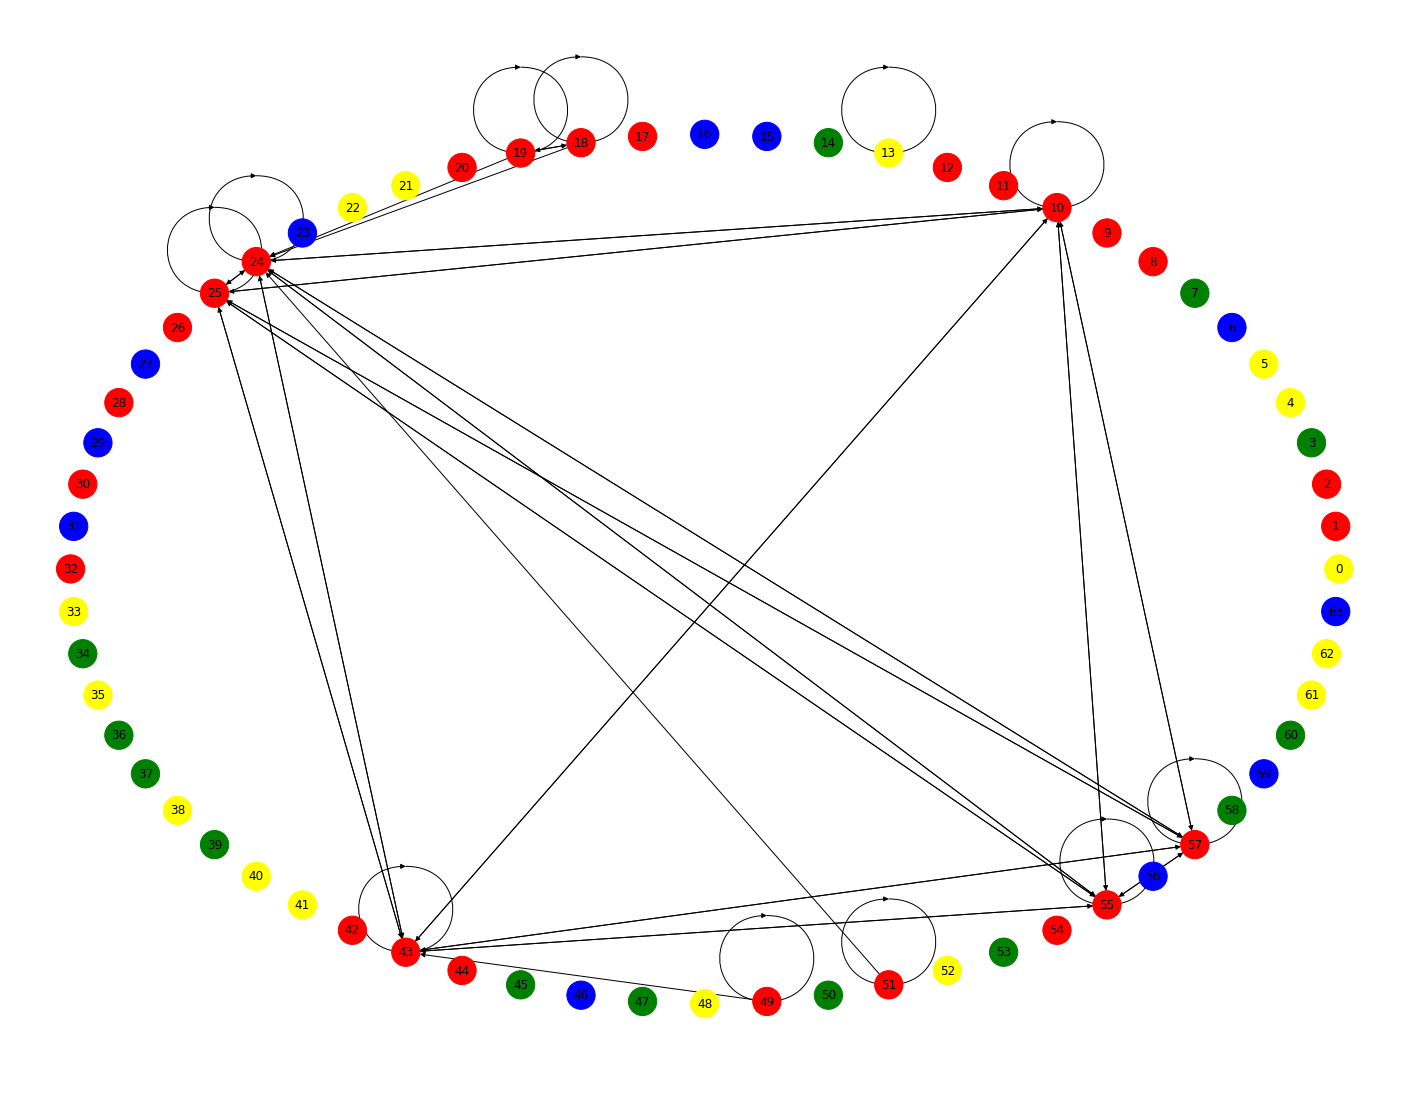

In [51]:
# gráfico associado as casas
fig, ax = plt.subplots(1,1,figsize=(25,20))

nx.draw_circular(PG, node_size=800, node_color = clh, with_labels=True)

plt.show()

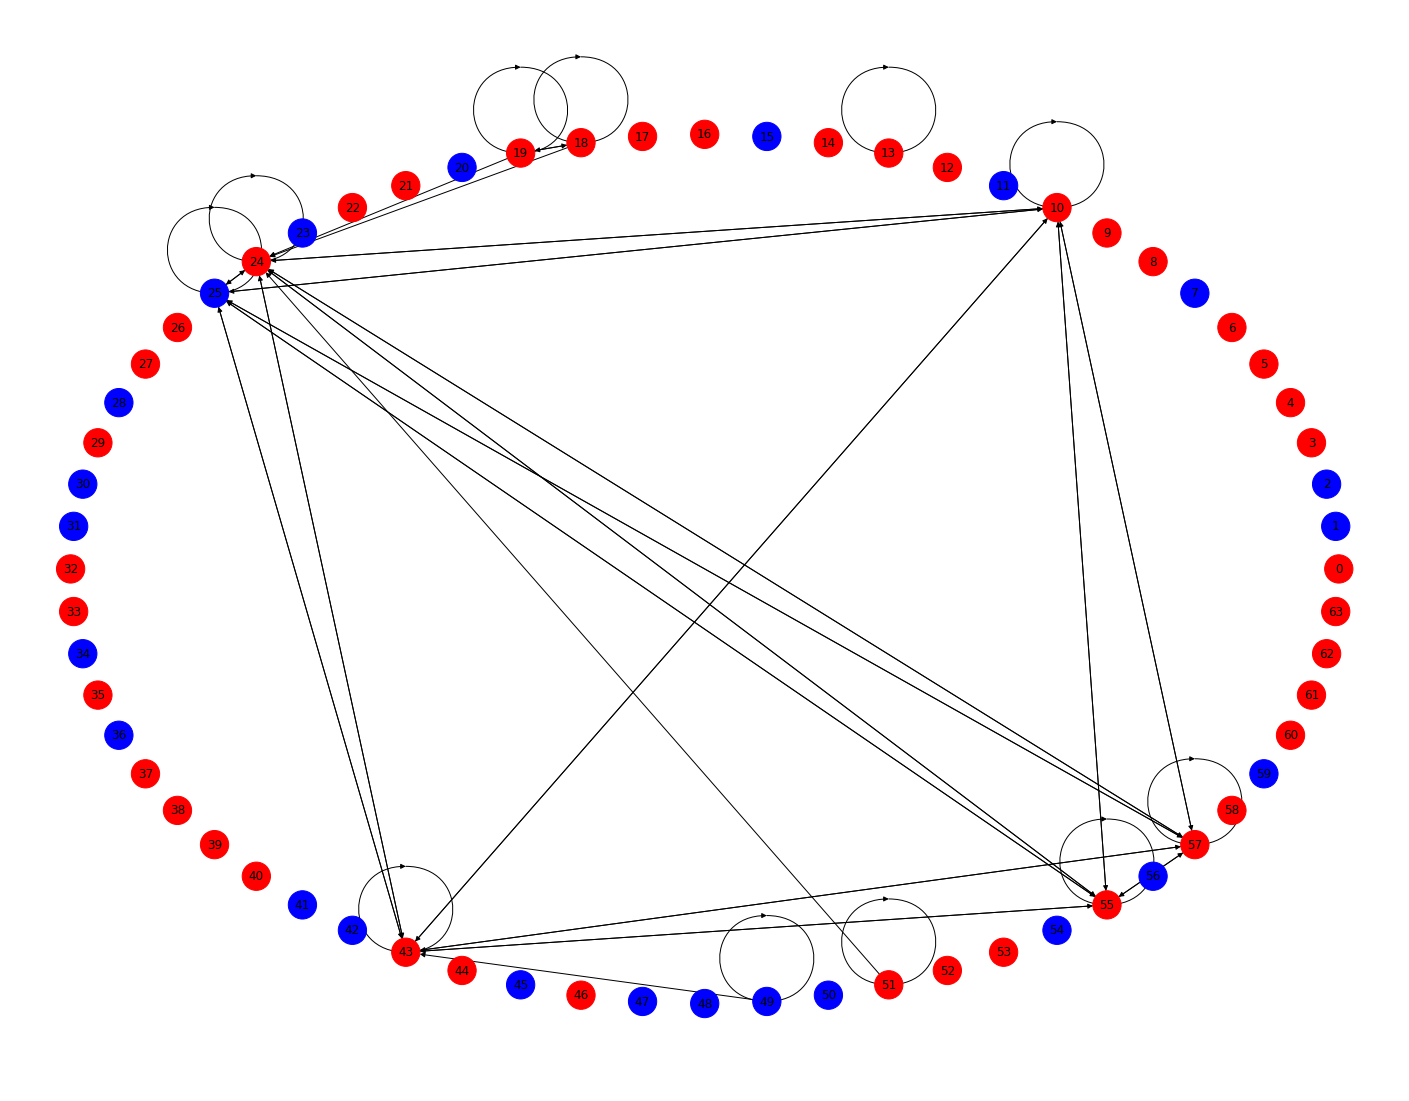

In [52]:
# gráfico associado aos generos

fig, ax = plt.subplots(1,1,figsize=(25,20))

nx.draw_circular(PG, node_size=800, node_color = clg, with_labels=True)

plt.show()

In [31]:
print(f'Densidade: {nx.density(PG)}')

Densidade: 0.011656746031746032


In [46]:
print(f'Agrupamento: {nx.transitivity(PG)}')


Agrupamento: 0.9838709677419355


In [47]:
print(f'Reciprocidade: {nx.reciprocity(PG)}')

Reciprocidade: 0.6808510638297872
